In [2]:
#
# In this and the following exercises, you'll be adding train test splits to the data
# to see how it changes the performance of each classifier
#
# The code provided will load the Titanic dataset like you did in project 0, then train
# a decision tree (the method you used in your project) and a Bayesian classifier (as
# discussed in the introduction videos). You don't need to worry about how these work for
# now. 
#
# What you do need to do is import a train/test split, train the classifiers on the
# training data, and store the resulting accuracy scores in the dictionary provided.

In [12]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [8]:
# Load the dataset
X = pd.read_csv('titanic_data.csv')
X.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# Limit to numeric data
X = X._get_numeric_data()
# Separate the labels
y = X['Survived']
# Remove labels from the inputs, and age due to missing data
del X['Age'], X['Survived']
X.head()

,PassengerId,Pclass,SibSp,Parch,Fare
0,1,3,1,0,7.2500
1,2,1,1,0,71.2833
2,3,3,0,0,7.9250
3,4,1,1,0,53.1000
4,5,3,0,0,8.0500


In [20]:
# TODO: split the data into training and testing sets,
# using the standard settings for train_test_split.
# Then, train and test the classifiers with your newly split data instead of X and y.

X_train, X_test, y_train, y_test =  train_test_split(X, y)

# The decision tree classifier
clf1 = DecisionTreeClassifier()
clf1.fit(X_train,y_train)
tree_accuracy = accuracy_score(y_test, clf1.predict(X_test))
print "Decision Tree has accuracy: ", tree_accuracy
# The naive Bayes classifier

clf2 = GaussianNB()
clf2.fit(X_train,y_train)
gaussian_accuracy = accuracy_score(y_test, clf2.predict(X_test))
print "GaussianNB has accuracy: ", gaussian_accuracy

Decision Tree has accuracy:  0.636771300448
GaussianNB has accuracy:  0.686098654709


### Build confusion matrix

In [22]:
# In this exercise, we'll use the Titanic dataset as before, train two classifiers and
# look at their confusion matrices. Your job is to create a train/test split in the data
# and report the results in the dictionary at the bottom.

import numpy as np
import pandas as pd

# Load the dataset
from sklearn import datasets

X = pd.read_csv('titanic_data.csv')

X = X._get_numeric_data()
y = X['Survived']
del X['Age'], X['Survived']


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

# TODO: split the data into training and testing sets,
# using the default settings for train_test_split (or test_size = 0.25 if specified).
# Then, train and test the classifiers with your newly split data instead of X and y.
X_train, X_test, y_train, y_test =  train_test_split(X, y)

clf1 = DecisionTreeClassifier()
clf1.fit(X_train,y_train)
dt_cm = confusion_matrix(y_test,clf1.predict(X_test))
print "Confusion matrix for this Decision Tree:\n", dt_cm

clf2 = GaussianNB()
clf2.fit(X_train,y_train)
gaussian_cm = confusion_matrix(y_test,clf2.predict(X_test))
print "GaussianNB confusion matrix:\n", gaussian_cm

#TODO: store the confusion matrices on the test sets below

confusions = {
 "Naive Bayes": gaussian_cm
 "Decision Tree": dt_cm
}

Confusion matrix for this Decision Tree:
[[116  32]
 [ 37  38]]
GaussianNB confusion matrix:
[[127  21]
 [ 41  34]]


### Precision vs recall

In [24]:
# As with the previous exercises, let's look at the performance of a couple of classifiers
# on the familiar Titanic dataset. Add a train/test split, then store the results in the
# dictionary provided.

import numpy as np
import pandas as pd

# Load the dataset
X = pd.read_csv('titanic_data.csv')

X = X._get_numeric_data()
y = X['Survived']
del X['Age'], X['Survived']


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score as recall
from sklearn.metrics import precision_score as precision
from sklearn.naive_bayes import GaussianNB

# TODO: split the data into training and testing sets,
# using the standard settings for train_test_split.
# Then, train and test the classifiers with your newly split data instead of X and y.
X_train, X_test, y_train, y_test =  train_test_split(X, y)

clf1 = DecisionTreeClassifier()
clf1.fit(X_train, y_train)
dt_recall, dt_precision = recall(y_test,clf1.predict(X_test)),precision(y_test,clf1.predict(X_test))
print "Decision Tree recall: {:.2f} and precision: {:.2f}".format(dt_recall, dt_precision)

clf2 = GaussianNB()
clf2.fit(X_train, y_train)
nb_recall, nb_precision = recall(y_test,clf2.predict(X_test)),precision(y_test,clf2.predict(X_test))
print "GaussianNB recall: {:.2f} and precision: {:.2f}".format(nb_recall, nb_precision)

results = {
  "Naive Bayes Recall": nb_recall,
  "Naive Bayes Precision": nb_precision,
  "Decision Tree Recall": dt_recall,
  "Decision Tree Precision": dt_precision
}

Decision Tree recall: 0.57 and precision: 0.44
GaussianNB recall: 0.34 and precision: 0.53


### f1 score

In [25]:
# As usual, use a train/test split to get a reliable F1 score from two classifiers, and
# save it the scores in the provided dictionaries.

import numpy as np
import pandas as pd

# Load the dataset
X = pd.read_csv('titanic_data.csv')

X = X._get_numeric_data()
y = X['Survived']
del X['Age'], X['Survived']

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB

# TODO: split the data into training and testing sets,
# using the standard settings for train_test_split.
# Then, train and test the classifiers with your newly split data instead of X and y.
X_train, X_test, y_train, y_test =  train_test_split(X, y)

clf1 = DecisionTreeClassifier()
clf1.fit(X_train, y_train)
dt_f1 = f1_score(y_test, clf1.predict(X_test))
print "Decision Tree F1 score: {:.2f}".format(dt_f1)

clf2 = GaussianNB()
clf2.fit(X_train, y_train)
nb_f1 = f1_score(y_test, clf2.predict(X_test))
print "GaussianNB F1 score: {:.2f}".format(nb_f1)

F1_scores = {
 "Naive Bayes": nb_f1,
 "Decision Tree": dt_f1
}

Decision Tree F1 score: 0.54
GaussianNB F1 score: 0.41


### Mean absolute error

In [26]:
import numpy as np
import pandas as pd

# Load the dataset
from sklearn.datasets import load_linnerud

linnerud_data = load_linnerud()
X = linnerud_data.data
y = linnerud_data.target

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error as mae
from sklearn.linear_model import LinearRegression

# TODO: split the data into training and testing sets,
# using the standard settings for train_test_split.
# Then, train and test the classifiers with your newly split data instead of X and y.

X_train, X_test, y_train, y_test = train_test_split(X, y)

reg1 = DecisionTreeRegressor()
reg1.fit(X_train, y_train)
dt_mae = mae(y_test,reg1.predict(X_test))
print "Decision Tree mean absolute error: {:.2f}".format(dt_mae)

reg2 = LinearRegression()
reg2.fit(X_train, y_train)
lr_mae = mae(y,reg2.predict(X))
print "Linear regression mean absolute error: {:.2f}".format(lr_mae)

results = {
 "Linear Regression": lr_mae,
 "Decision Tree": dt_mae
}

Decision Tree mean absolute error: 8.13
Linear regression mean absolute error: 9.49


### MSE

In [28]:
import numpy as np
import pandas as pd

# Load the dataset
from sklearn.datasets import load_linnerud

linnerud_data = load_linnerud()
X = linnerud_data.data
y = linnerud_data.target

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression

# TODO: split the data into training and testing sets,
# using the standard settings for train_test_split.
# Then, train and test the classifiers with your newly split data instead of X and y.

X_train, X_test, y_train, y_test = train_test_split(X, y)

reg1 = DecisionTreeRegressor()
reg1.fit(X_train, y_train)
dt_mse = mse(y_test,reg1.predict(X_test))
print "Decision Tree mean squared error: {:.2f}".format(dt_mse)

reg2 = LinearRegression()
reg2.fit(X_train, y_train)
lr_mse = mse(y,reg2.predict(X))
print "Linear regression mean squared error: {:.2f}".format(lr_mse)

results = {
 "Linear Regression": lr_mse,
 "Decision Tree": dt_mse
}

Decision Tree mean squared error: 600.27
Linear regression mean squared error: 164.65


### Learning curve

In this exercise we'll examine a learner which has high variance, and tries to learn
nonexistant patterns in the data.
Use the learning curve function from sklearn.learning_curve to plot learning curves
of both training and testing error.
CODE YOU HAVE TO TYPE IN IS IN LINE 35


In [30]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
# PLEASE NOTE:
from sklearn.model_selection import learning_curve
#from sklearn.learning_curve import learning_curve # sklearn version 0.17
from sklearn.cross_validation import KFold
from sklearn.metrics import explained_variance_score, make_scorer

/home/buzz/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [43]:
# Set the learning curve parameters; you'll need this for learning_curves
size = 1000
cv = KFold(size,shuffle=True)
score = make_scorer(explained_variance_score)

# Create a series of data that forces a learner to have high variance
X = np.round(np.reshape(np.random.normal(scale=5,size=2*size),(-1,2)),2)
y = np.array([[np.sin(x[0]+np.sin(x[1]))] for x in X])

def plot_curve():
    # Defining our regression algorithm
    reg = DecisionTreeRegressor()
    # Fit our model using X and y
    reg.fit(X,y)
    print "Regressor score: {:.4f}".format(reg.score(X,y))
    
    # TODO: Use learning_curve imported above to create learning curves for both the
    #       training data and testing data. You'll need reg, X, y, cv and score from above.
    
    train_sizes, train_scores, test_scores = learning_curve(reg, X, y, cv=cv, scoring=score)
    
    # Taking the mean of the test and training scores
    train_scores_mean = np.mean(train_scores,axis=1)
    test_scores_mean = np.mean(test_scores,axis=1)
    
    # Plotting the training curves and the testing curves using train_scores_mean and test_scores_mean 
    plt.plot(train_sizes ,train_scores_mean,'-o',color='b',label="train_scores_mean")
    plt.plot(train_sizes,test_scores_mean ,'-o',color='r',label="test_scores_mean")
    
    # Plot aesthetics
    plt.ylim(-0.1, 1.1)
    plt.ylabel("Curve Score")
    plt.xlabel("Training Points")
    plt.legend(bbox_to_anchor=(1.1, 1.1))    
    plt.show()

Regressor score: 1.0000


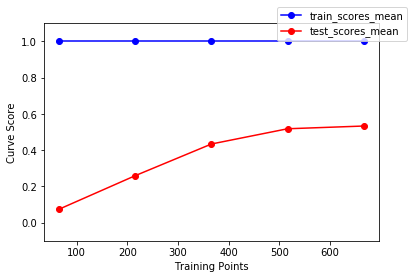

In [44]:
plot_curve()